<a href="https://colab.research.google.com/github/Satwikram/Brain-MRI-Segmentation/blob/main/MRI%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

**Brain MRI Segmentation**

### Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
from IPython.display import display
import os
from glob import glob
import random
import sys
%matplotlib inline

### Loading Dataset

In [3]:
dataset = pd.read_csv('/content/drive/My Drive/Healthcare AI Datasets/Brain_MRI/data_mask.csv')

In [4]:
%cd /content/drive/My Drive/Healthcare AI Datasets/Brain_MRI

/content/drive/My Drive/Healthcare AI Datasets/Brain_MRI


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [6]:
dataset.describe()

mask
count  3929.000000
mean      0.349453
std       0.476858
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

In [7]:
dataset.head()

patient_id  ... mask
0  TCGA_CS_5395_19981004  ...    0
1  TCGA_CS_5395_19981004  ...    0
2  TCGA_CS_5395_19981004  ...    0
3  TCGA_CS_5395_19981004  ...    0
4  TCGA_CS_5395_19981004  ...    0

[5 rows x 4 columns]

In [8]:
dataset['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

### Data Visualization

In [9]:
# Use plotly to plot interactive bar chart
import plotly.graph_objects as go

In [10]:
fig = go.Figure([go.Bar(x = dataset['mask'].value_counts().index, y = dataset['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

### Visualizing MRI Images

In [11]:
dataset['mask_path']

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: mask_path, Length: 3929, dtype: object

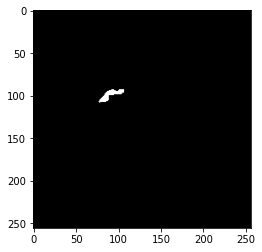

In [12]:
plt.imshow(cv2.imread(dataset.mask_path[623]))

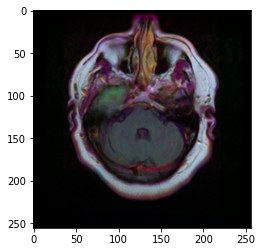

In [13]:
plt.imshow(cv2.imread(dataset.image_path[623]))

In [15]:
cv2.imread(dataset.mask_path[623]).max()

255

In [16]:
cv2.imread(dataset.mask_path[623]).min()

0

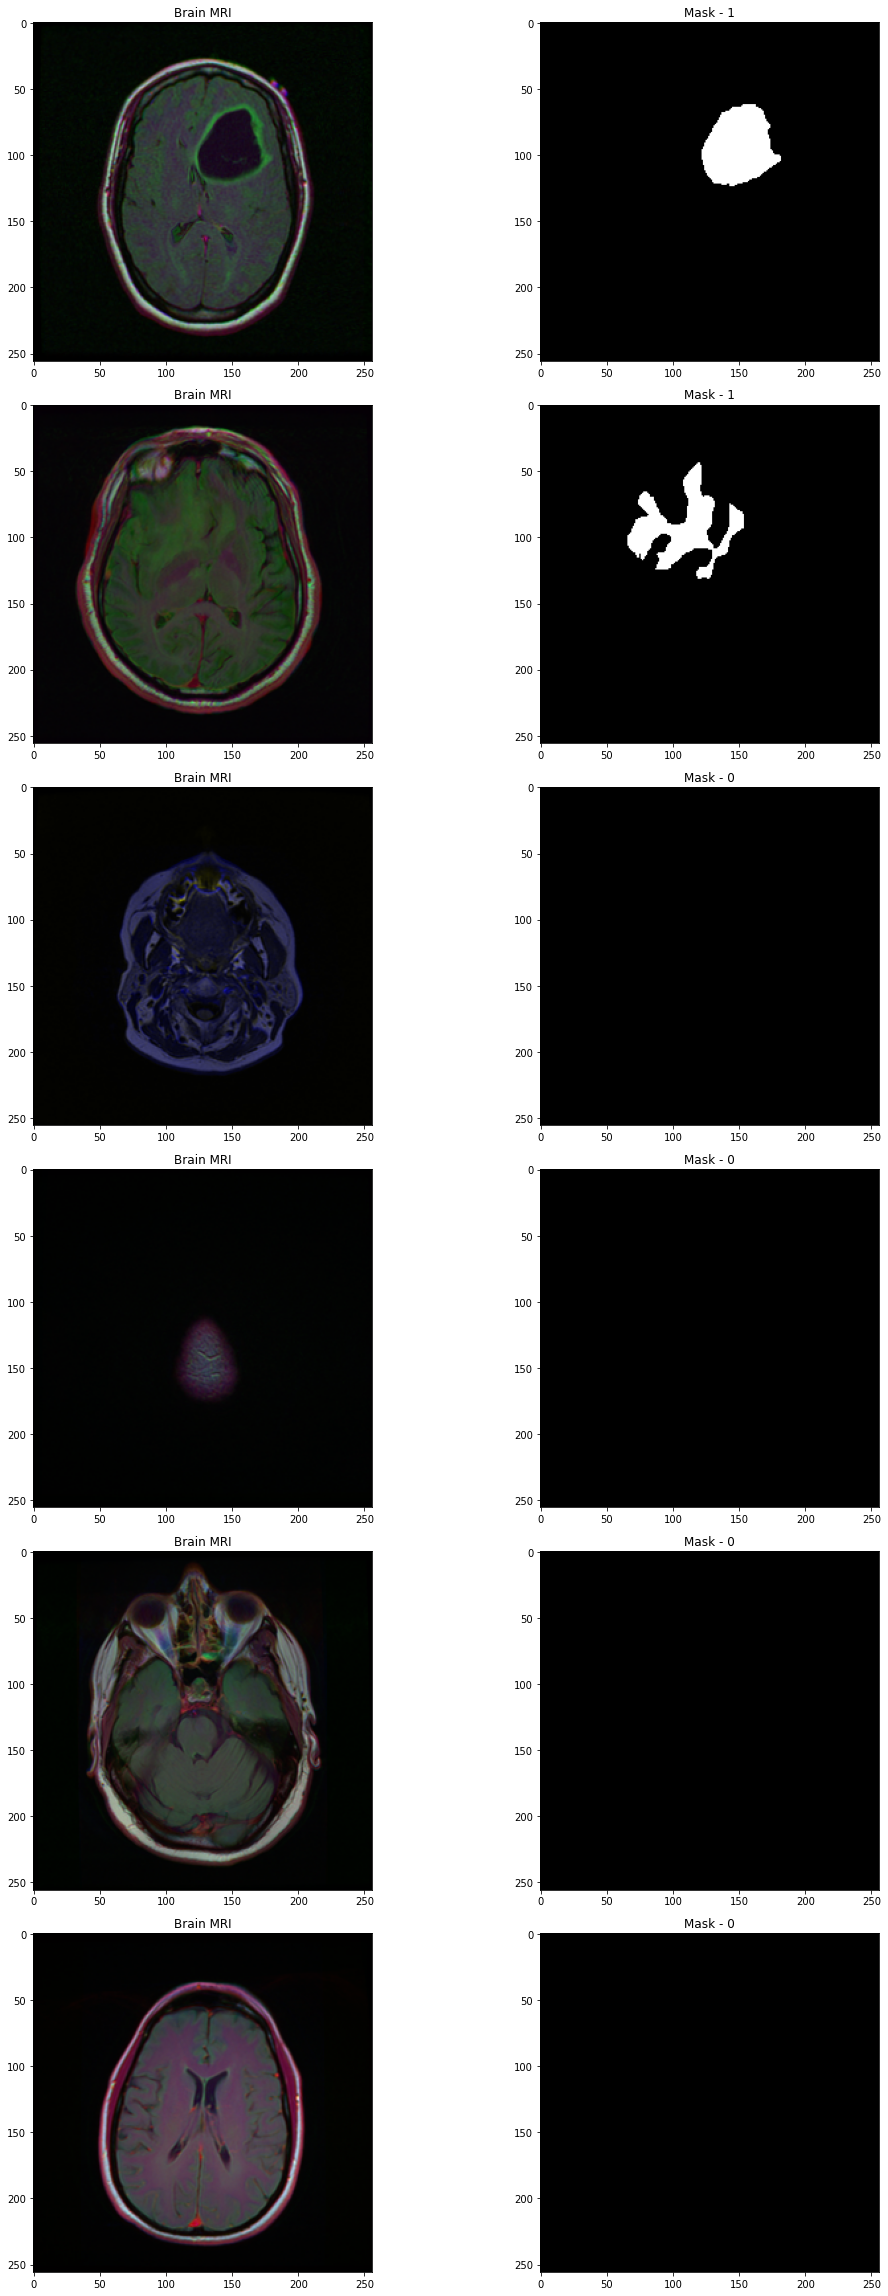

In [20]:
import random

fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0

for x in range(6):
  i = random.randint(0, len(dataset))
  axs[count][0].title.set_text("Brain MRI") # set title
  axs[count][0].imshow(cv2.imread(dataset.image_path[i])) # show MRI 
  axs[count][1].title.set_text("Mask - " + str(dataset['mask'][i])) # plot title on the mask (0 or 1)
  axs[count][1].imshow(cv2.imread(dataset.mask_path[i])) # Show corresponding mask
  count += 1

fig.tight_layout()

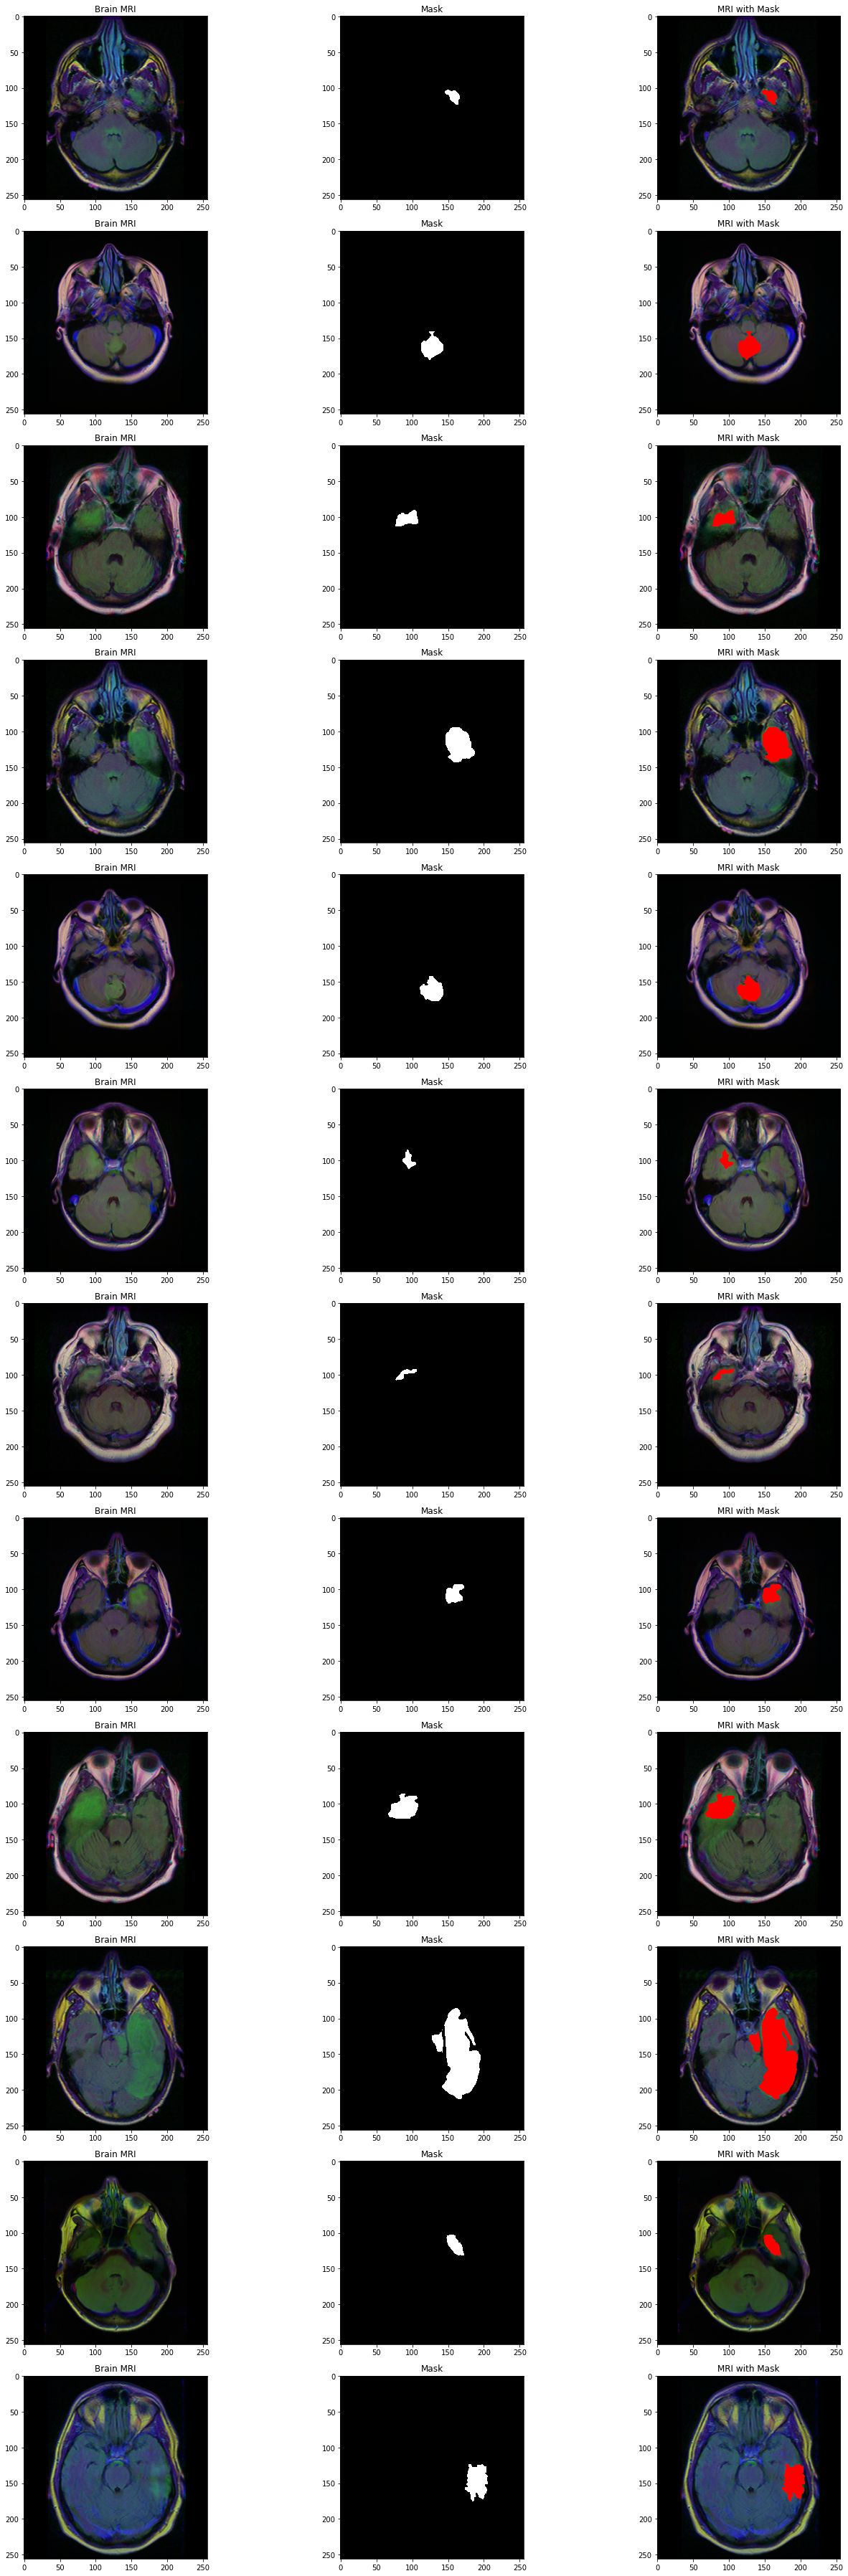

In [23]:
count = 0
fig, axs = plt.subplots(12, 3, figsize = (20, 50))
for i in range(len(dataset)):
  if dataset['mask'][i] ==1 and count <12:
    img = io.imread(dataset.image_path[i])
    axs[count][0].title.set_text('Brain MRI')
    axs[count][0].imshow(img)

    mask = io.imread(dataset.mask_path[i])
    axs[count][1].title.set_text('Mask')
    axs[count][1].imshow(mask, cmap = 'gray')

    
    img[mask == 255] = (255,0, 0)
    axs[count][2].title.set_text('MRI with Mask')
    axs[count][2].imshow(img)
    count+=1

fig.tight_layout()

**Important Links**

Feature Extraction and Convolutions: https://setosa.io/ev/image-kernels/
CNN Visualization: https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

**Resource for Transfer Learning**

- Excellent Resource on transfer learning by Dipanjan Sarkar: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
- Article by Jason Brownlee: https://machinelearningmastery.com/transfer-learning-for-deep-learning/

### Dropping Patient Id

In [24]:
dataset.drop(columns = ['patient_id'], axis = 1, inplace = True)

In [25]:
dataset.head(0)

Empty DataFrame
Columns: [image_path, mask_path, mask]
Index: []

In [26]:
dataset.shape

(3929, 3)

### Converting Mask to String

Convert the data in mask column to string format, to use categorical mode in flow_from_dataframe

You will get this error message if you comment out the following code line:

TypeError: If class_mode="categorical", y_col="mask" column values must be type string, list or tuple.

In [27]:
dataset['mask'] = dataset['mask'].apply(lambda x: str(x))

In [28]:
dataset.dtypes

image_path    object
mask_path     object
mask          object
dtype: object

### Splitting Data into Train and Test

In [29]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size = 0.15)

### Data Augmentation

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15)

### Data Generator

In [32]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory= './',
    x_col = 'image_path',
    y_col = 'mask',
    subset="training",
    batch_size=16,
    shuffle=True,
    class_mode="categorical",
    target_size=(256,256)
)

Found 2839 validated image filenames belonging to 2 classes.


In [33]:
valid_generator=datagen.flow_from_dataframe(
  dataframe=train,
  directory= './',
  x_col='image_path',
  y_col='mask',
  subset="validation",
  batch_size=16,
  shuffle=True,
  class_mode="categorical",
  target_size=(256,256)
)

Found 500 validated image filenames belonging to 2 classes.


In [35]:
# Create a data generator for test images
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
  dataframe=test,
  directory= './',
  x_col='image_path',
  y_col='mask',
  batch_size=16,
  shuffle=False,
  class_mode='categorical',
  target_size=(256,256)
)


Found 590 validated image filenames belonging to 2 classes.


### Taking Base Model (Transfer Learning)

In [48]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Input, AveragePooling2D

In [39]:
base_model = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape = (256, 256, 3)))

94773248/94765736 [==============================] - 0s 0us/step


In [41]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### Plotting model

In [42]:
from tensorflow.keras.utils import plot_model

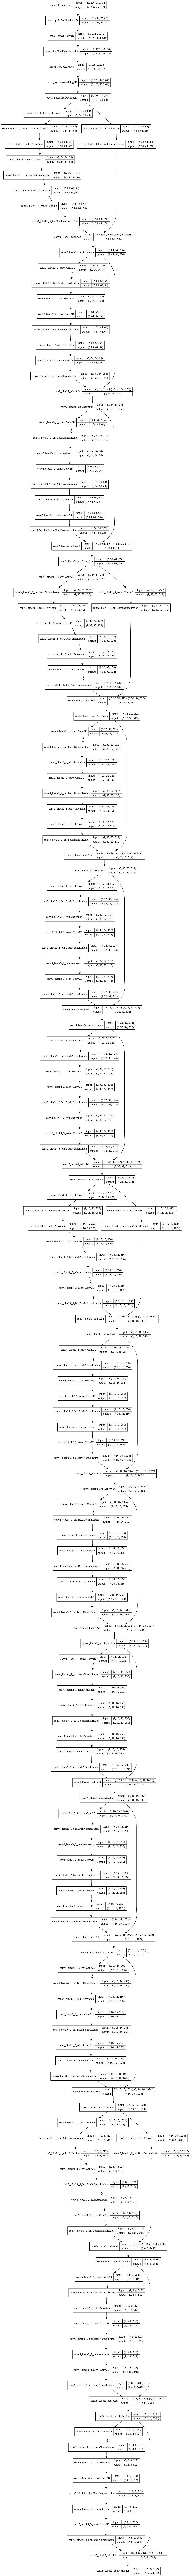

In [43]:
plot_model(base_model, 'resnet.png', show_shapes = True, show_layer_names = True)

### Freezing the model weights

In [46]:
for layer in base_model.layers:
  layers.trainable = False 

### Building model

In [50]:
headmodel = base_model.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(units = 256, activation = 'relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = base_model.input, outputs = headmodel)

In [51]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

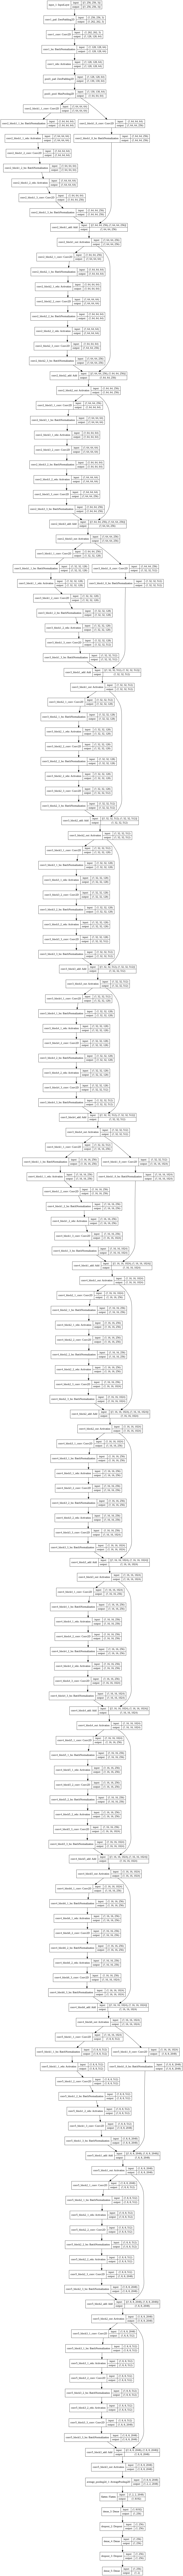

In [52]:
plot_model(model, 'my_model.png', show_layer_names = True, show_shapes = True)

### Compiling the model

In [53]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Callbacks and Checkpoints

In [54]:
from tensorflow.keras.callbacks import *

In [55]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 8)

# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath="brain_mri.h5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 20, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

Epoch 1/20
 42/177 [======>.......................] - ETA: 19:01 - loss: 1.0103 - accuracy: 0.5238